<a href="https://colab.research.google.com/github/avinash-vk/Sentiment-analysis-on-amazon-reviews/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

In [ ]:
#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
#Libraries to implement Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
#Libraries to implement and optimize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#To create Pipelines and select best feautures before passing through the model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
#Pre-processing and NLP libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
import nltk
import re
import string
#Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
URL = "/content/drive/MyDrive/datasets fragmented/coldropDS-50k_cleaned.csv"

In [ ]:
#Reading the dataset
df = pd.DataFrame(pd.read_csv(URL))
#Dropping Nan value rows pertaining to the Reviews
df = df.dropna(axis=0,subset=['cleaned_reviews'])

In [ ]:
#Displaying dataset sample for sake of clarity and readability
df.head()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...


In [ ]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [ ]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]


In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
#text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(criterion='entropy')),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier3 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', ComplementNB(alpha=11)),])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])
text_clf_classifier5 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001)),])
text_clf_classifier6 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001,loss='log')),])

In [ ]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

Random Forest Classifier Paramteres tuned ->

*   No of estimators - No. of trees - 100,
*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy.
*Cost complexity pruning paramter - 0.0(No pruning)


In [ ]:
print("Random Forest Classifier - Count Vectorizer:")
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_s

Naive Bayes methods
* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=11 for Counter Vectorizer for Tokenization

In [ ]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))


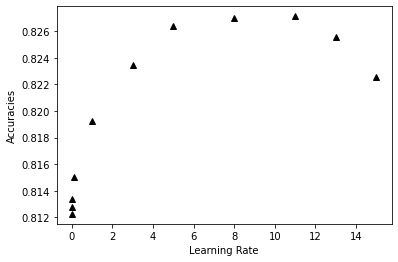

[0.8122567122467312, 0.8127557640483082, 0.8133546262102006, 0.8150514023355624, 0.8192434374688092, 0.8234354726020561, 0.8264297834115181, 0.8270286455734105, 0.827128455933726, 0.8255314901686795, 0.8225371793592174]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fc3034e11e0>)),
                ('clf',
                 MultinomialNB(alpha=11, class_prior=None, fit_prior=True))],
         verbose=False)
0.827128455933726


In [ ]:
print("Complement Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier3)

Complement Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fc3034e11e0>)),
                ('clf',
                 ComplementNB(alpha=8, class_prior=None, fit_prior=True,
                              norm=False))],
         ver

In [ ]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fc3034e11e0>)),
                ('clf',
                 BernoulliNB(alpha=8, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verb

Stochastic Gradient methods
* Learning Rate Variants : 0.000001,0.000004,0.000006,0.000008,0.00001,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.00002,0.00003
* Best Results were given by alpha=0.00001 for TD-IDF for Tokenization

In [ ]:
#Running SDGClassifier - Linear SVM for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.000001,0.000004,0.000006,0.000008,0.00001,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.00002,0.00003]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', SGDClassifier(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

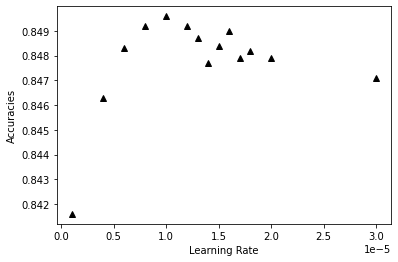

[0.841600958179459, 0.8462920451142829, 0.8482882523205909, 0.8491865455634294, 0.8495857870046911, 0.8491865455634294, 0.8486874937618525, 0.8476893901586985, 0.8483880626809063, 0.8489869248427987, 0.8478890108793292, 0.8481884419602754, 0.8478890108793292, 0.8470905279968061]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("SGDClassifier SVM : - Count Vectorizer")
run_model(text_clf_classifier5)

SGDClassifier SVM : - Count Vectorizer
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal

In [ ]:
print("SGDClassifier Logistic Regression : - Count Vectorizer")
run_model(text_clf_classifier6)

SGDClassifier Logistic Regression : - Count Vectorizer
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learni

In [ ]:
#text_clf_classifier7 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
text_clf_classifier8 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=0.1)),])
text_clf_classifier9 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=3000)),('clf', ComplementNB(alpha=0.1)),])
text_clf_classifier10 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=0.1)),])
text_clf_classifier11 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001)),])
text_clf_classifier12 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001,loss='log')),])

Random Forest Classifier Paramteres tuned with the help og GridSearch ->

*   No of estimators - No. of trees - 100,
*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy.
*Cost complexity pruning paramter - 0.0(No pruning gives best results - could be because of overfitting),0.5,1

> Indented block



In [ ]:
#Creating sample training-test data to be passed to the GridSearch
text_counts =tfidf_vectorizer.fit_transform(df['cleaned_reviews'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['y'], test_size=0.25, random_state=5)

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 18.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
text_clf_classifier7 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', 
                   n_estimators=100,max_depth=80)),])
print("Random Forest Classifier - TDF-IDF Vectorizer:")
run_model(text_clf_classifier7)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=80, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,


Naive Bayes methods
* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=0.1 for TDF-IDF for Tokenization

In [ ]:
#Running Multinomial Naive Bayes - TF-IDF Tokenizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.001,0.01,0.09,0.1,0.11,0.15,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

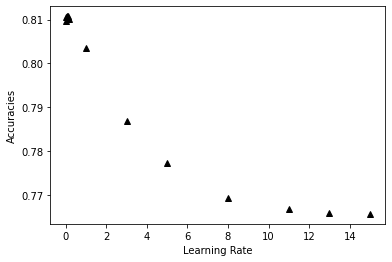

[0.8095618325182153, 0.8105599361213695, 0.8107595568420002, 0.8107595568420002, 0.810460125761054, 0.8101606946801078, 0.803473400538976, 0.786805070366304, 0.7772232757760256, 0.7692384469507935, 0.7667431879429085, 0.7659447050603853, 0.765645273979439]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("Multinomial Naive Bayes - TDF-IDF Vectorizer:")
run_model(text_clf_classifier8)

Multinomial Naive Bayes - TDF-IDF Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fc303

In [ ]:
print("Complement Naive Bayes - TDF-IDF Vectorizer:")
run_model(text_clf_classifier9)

Complement Naive Bayes - TDF-IDF Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x7fc3034

In [ ]:
print("Bernoulli Naive Bayes - TDF-IDF Vectorizer:")
run_model(text_clf_classifier10)

Bernoulli Naive Bayes - TDF-IDF Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fc3034e

In [ ]:
print("SGDClassifier SVM  - TDF-IDF Vectorizer:")
run_model(text_clf_classifier11)

SGDClassifier SVM  - TDF-IDF Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?...
                ('clf',
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                 

In [ ]:
print("SGDClassifier Logistic Regression :TDF-IDF Vectorizer:")
run_model(text_clf_classifier12)

SGDClassifier Logistic Regression :TDF-IDF Vectorizer:
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?...
                ('clf',
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
   

In [ ]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [ ]:
prediction("works good, viewing angle critical for good picture. purchased for use in a rv so the size was perfect for the location")

2